In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 444s 3us/step


In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_train[:5])    # y is numbers, not labels
# that 3 in the end is related to rgb colors

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
[[6]
 [9]
 [9]
 [4]
 [1]]


In [20]:
y_train = y_train.reshape(-1,)   # -1 means I don't want to change the first dimension
y_train[:5]                      # now it is a 1-dimensional array

array([6, 9, 9, 4, 1], dtype=uint8)

In [23]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [51]:
def plot_sample(X, y, y_p, index):
    plt.figure(figsize=(15,2))   # better to see the image when it's smaller
    plt.imshow(X[index])
    plt.xlabel("True: {}, Predicted: {}".format(classes[y[index]], classes[y_p[index]]))

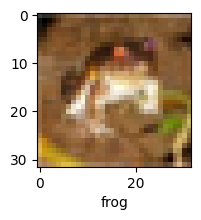

In [25]:
plot_sample(X_train, y_train, 0)

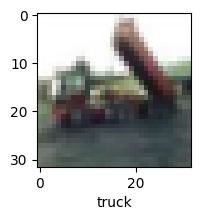

In [27]:
plot_sample(X_train, y_train, 2)

Nomralizing Data

In [29]:
# you have to normalize pixel values by 255 because it is a value between 0 and 255
X_train = X_train / 255
X_test = X_test / 255

Building The CNN

In [31]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid'),
])

ann.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

# you can see that ann doesn't perform well because the training cost is expensive and it
# doesn't detect certain patterns in the image

Epoch 1/5
1563/1563 [==============================] - 48s 31ms/step - loss: 1.8131 - accuracy: 0.3517
Epoch 2/5
1563/1563 [==============================] - 48s 31ms/step - loss: 1.6218 - accuracy: 0.4269
Epoch 3/5
1563/1563 [==============================] - 48s 31ms/step - loss: 1.5412 - accuracy: 0.4575
Epoch 4/5
1563/1563 [==============================] - 48s 31ms/step - loss: 1.4808 - accuracy: 0.4781
Epoch 5/5
1563/1563 [==============================] - 48s 31ms/step - loss: 1.4325 - accuracy: 0.4952


In [37]:
cnn = models.Sequential([
    # cnn
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    # 32 pattern detectors or filters are used in the first Conv layer
    # MaxPooling will use a 2 by 2 grid
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    # dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),     # using lesser neurons and nodes because cnn did most of the work
    layers.Dense(10, activation='softmax'),  # using softmax for nonlinear equation
])
    
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 26s 16ms/step - loss: 1.3936 - accuracy: 0.5022
Epoch 2/20
1563/1563 [==============================] - 24s 15ms/step - loss: 1.0624 - accuracy: 0.6281
Epoch 3/20
1563/1563 [==============================] - 25s 16ms/step - loss: 0.9200 - accuracy: 0.6804
Epoch 4/20
1563/1563 [==============================] - 26s 17ms/step - loss: 0.8294 - accuracy: 0.7136
Epoch 5/20
1563/1563 [==============================] - 25s 16ms/step - loss: 0.7563 - accuracy: 0.7376
Epoch 6/20
1563/1563 [==============================] - 25s 16ms/step - loss: 0.6953 - accuracy: 0.7589
Epoch 7/20
1563/1563 [==============================] - 24s 15ms/step - loss: 0.6409 - accuracy: 0.7765
Epoch 8/20
1563/1563 [==============================] - 24s 16ms/step - loss: 0.5914 - accuracy: 0.7922
Epoch 9/20
1563/1563 [==============================] - 24s 15ms/step - loss: 0.5420 - accuracy: 0.8102
Epoch 10/20
1563/1563 [==============================] - 22s 14m

In [38]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 1.5780 - accuracy: 0.6833


[1.577986478805542, 0.6833000183105469]

In [40]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

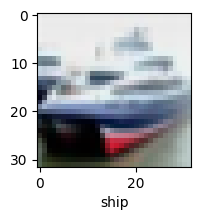

In [41]:
plot_sample(X_test, y_test, 1)

In [43]:
y_pred = cnn.predict(X_test)
y_classes = [np.argmax(element) for element in y_pred]

313/313 [==============================] - 2s 6ms/step


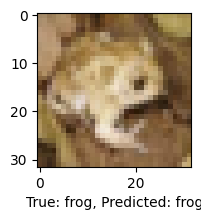

In [61]:
plot_sample(X_test, y_test, y_classes, np.random.choice(len(X_test)))